# Simple Model

- We don't have returns after 2022 Jan. 
- We have data until 2022 Sept.

- For model training:
    - Testing period --> 2021 June - 2022 Jan
    - Train period: 2017 June - 2021 June (3 years)
    One stock per line. Aggregate all data into one row

- For Inference:
    - Infer for periods between 2019 Sept. - 2022 Sept.
    - This will give us the returns for 2022 Sept. until 2023 March. 
    - Choose the top 15 stocks



In [1]:
cd ..

/Users/kaancaylan/Desktop/HEC/DataProjectQuinten-StockPrediction/quinten-stock-prediction


In [2]:
import pandas as pd
import numpy as np
import src.data.preprocessing as pr
import datetime as dt

In [3]:
df = pr.get_data()

/Users/kaancaylan/Desktop/HEC/DataProjectQuinten-StockPrediction/quinten-stock-prediction/src/data/preprocessing.py:7: DtypeWarning: Columns (8,17,26,33,34,66,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,252,253,255,257,259,261,263,265,267,269,270,271,272,273,274,275,276,277,278,279,280,284,285,286,290) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, delimiter=";", parse_dates=date_cols).iloc[:, 1:]


In [4]:
df

year  quarter  week acceptedDate  calendarYear  \
date       symbol                                                    
2017-03-31 558.SI   2017        3    13   2017-03-31        2017.0   
           8GW.IR   2017        3    13   2017-03-31        2017.0   
           A17U.SI  2017        3    13   2017-03-31        2017.0   
           A3M.MC   2017        3    13   2017-03-31        2017.0   
           A5G.IR   2017        3    13          NaT           NaN   
...                  ...      ...   ...          ...           ...   
2022-01-31 WLN.PA   2022        1     5          NaT           NaN   
           XFAB.PA  2022        1     5          NaT           NaN   
           XIL.PA   2022        1     5          NaT           NaN   
           XIOR.BR  2022        1     5          NaT           NaN   
           ZEL.NZ   2022        1     5          NaT           NaN   

                    costAndExpenses  costOfRevenue  \
date       symbol                                    
2017-03-31 558.SI      2.836700e+07     20313000.0   
           8GW.IR      1.768102e+05            0.0   
           A17U.SI     7.152700e+07     54868000.0   
           A3M.MC      2.048780e+08    126386000.0   
           A5G.IR               NaN            NaN   
...                             ...            ...   
2022-01-31 WLN.PA               NaN            NaN   
           XFAB.PA              NaN            NaN   
           XIL.PA               NaN            NaN   
           XIOR.BR              NaN            NaN   
           ZEL.NZ               NaN            NaN   

                    depreciationAndAmortization       ebitda  ebitdaratio  \
date       symbol                                                           
2017-03-31 558.SI                     1250000.0   13676000.0     0.327490   
           8GW.IR                           0.0    -174073.5     0.000000   
           A17U.SI                          0.0  102099000.0     0.488659   
           A3M.MC                     4392000.0   40472000.0     0.167446   
           A5G.IR                           NaN          NaN          NaN   
...                                         ...          ...          ...   
2022-01-31 WLN.PA                           NaN          NaN          NaN   
           XFAB.PA                          NaN          NaN          NaN   
           XIL.PA                           NaN          NaN          NaN   
           XIOR.BR                          NaN          NaN          NaN   
           ZEL.NZ                           NaN          NaN          NaN   

                    ...  estimatedSgaExpenseLow  \
date       symbol   ...                           
2017-03-31 558.SI   ...                     NaN   
           8GW.IR   ...                     NaN   
           A17U.SI  ...                     NaN   
           A3M.MC   ...                     NaN   
           A5G.IR   ...                     NaN   
...                 ...                     ...   
2022-01-31 WLN.PA   ...                     NaN   
           XFAB.PA  ...                     NaN   
           XIL.PA   ...                     NaN   
           XIOR.BR  ...                     NaN   
           ZEL.NZ   ...                     NaN   

                    numberAnalystEstimatedRevenue numberAnalystsEstimatedEps  \
date       symbol                                                              
2017-03-31 558.SI                             NaN                        NaN   
           8GW.IR                             NaN                        NaN   
           A17U.SI                            NaN                        NaN   
           A3M.MC                             NaN                        NaN   
           A5G.IR                             NaN                        NaN   
...                                           ...                        ...   
2022-01-31 WLN.PA                             NaN                        NaN   
           XFAB.PA  

In [5]:
df[df.year==2022].groupby("quarter").apply(lambda x: len(x.index.get_level_values(1).unique()))

quarter
1    1115
dtype: int64

In [6]:
df[df.year==2022].close.dropna()

date        symbol  
2022-01-31  0QF.F       148.268000
            22UA.F      156.159998
            2CRSI.PA      4.443000
            3CP.F         1.906000
            558.SI        1.204000
                           ...    
            WLN.PA       43.498000
            XFAB.PA       8.716000
            XIL.PA       38.820000
            XIOR.BR      48.390000
            ZEL.NZ        3.598000
Name: close, Length: 1115, dtype: float64

# Model: XGBoost 

In [ ]:
__Only keep stocks that are trading in Euros
currency_by_stock = df["reportedCurrency"].groupby("symbol").apply(lambda x:x.dropna()[0] if len(x.dropna()) > 0 else np.nan)
euro_stocks = currency_by_stock[currency_by_stock=="EUR"].index
idx = pd.IndexSlice[:, euro_stocks]
df = df.loc[idx, :]

In [8]:
# Set train and validation dates
train_dates = {"start": dt.datetime(2020, 6, 30), "end": dt.datetime(2021, 6, 30)}
val_dates = {"start": dt.datetime(2021, 6, 30), "end": dt.datetime(2022, 1, 31)}

X_train = df.loc[train_dates["start"]: train_dates["end"]]
X_train = X_train.unstack(level=0).drop("year", axis=1)
X_train

quarter                                                   week  \
date     2020-06-30 2020-09-30 2021-01-31 2021-03-31 2021-06-30 2020-06-30   
symbol                                                                       
0O9.F           6.0        9.0        1.0        NaN        NaN       27.0   
0QF.F           6.0        9.0        1.0        3.0        6.0       27.0   
22UA.F          6.0        9.0        1.0        3.0        6.0       27.0   
2CRSI.PA        6.0        9.0        1.0        3.0        6.0       27.0   
3CP.F           6.0        9.0        1.0        3.0        6.0       27.0   
...             ...        ...        ...        ...        ...        ...   
MLIML.PA        NaN        NaN        NaN        NaN        6.0        NaN   
MLMON.PA        NaN        NaN        NaN        NaN        6.0        NaN   
PRR.CN          NaN        NaN        NaN        NaN        6.0        NaN   
RECV3.SA        NaN        NaN        NaN        NaN        6.0        NaN   
WDGY.CN         NaN        NaN        NaN        NaN        6.0        NaN   

                                                      ...  \
date     2020-09-30 2021-01-31 2021-03-31 2021-06-30  ...   
symbol                                                ...   
0O9.F          40.0        4.0        NaN        NaN  ...   
0QF.F          40.0        4.0       13.0       26.0  ...   
22UA.F         40.0        4.0       13.0       26.0  ...   
2CRSI.PA       40.0        4.0       13.0       26.0  ...   
3CP.F          40.0        4.0       13.0       26.0  ...   
...             ...        ...        ...        ...  ...   
MLIML.PA        NaN        NaN        NaN       26.0  ...   
MLMON.PA        NaN        NaN        NaN       26.0  ...   
PRR.CN          NaN        NaN        NaN       26.0  ...   
RECV3.SA        NaN        NaN        NaN       26.0  ...   
WDGY.CN         NaN        NaN        NaN       26.0  ...   

         market_value_per_share                                              \
date                 2020-06-30 2020-09-30 2021-01-31 2021-03-31 2021-06-30   
symbol                                                                        
0O9.F                       NaN        NaN        NaN        NaN        NaN   
0QF.F                       NaN        NaN        NaN        NaN        NaN   
22UA.F                60.630058    58.8400        NaN    91.5000   189.2500   
2CRSI.PA                    NaN        NaN        NaN        NaN        NaN   
3CP.F                  1.495000     2.3495        NaN     2.8195     2.9295   
...                         ...        ...        ...        ...        ...   
MLIML.PA                    NaN        NaN        NaN        NaN        NaN   
MLMON.PA                    NaN        NaN        NaN        NaN        NaN   
PRR.CN                      NaN        NaN        NaN        NaN        NaN   
RECV3.SA                    NaN        NaN        NaN        NaN        NaN   
WDGY.CN                     NaN        NaN        NaN        NaN        NaN   

            pe_ratio                                              
date      2020-06-30 2020-09-30 2021-01-31 2021-03-31 2021-06-30  
symbol                                                            
0O9.F            NaN        NaN        NaN        NaN        NaN  
0QF.F            NaN        NaN        NaN        NaN        NaN  
22UA.F   -159.552784 -66.863636        NaN  19.719828  16.571804  
2CRSI.PA         NaN        NaN        NaN        NaN        NaN  
3CP.F       7.919280  11.573892        NaN   9.065916   8.823795  
...              ...        ...        ...        ...        ...  
MLIML.PA         NaN        NaN        NaN        NaN        NaN  
MLMON.PA         NaN        NaN        NaN        NaN        NaN  
PRR.CN           NaN        NaN        NaN        NaN        NaN  
RECV3.SA         NaN        NaN        NaN        NaN        NaN  
WDGY.CN          NaN        NaN        NaN        NaN        NaN  

[1191 rows x 1445 

In [9]:
# y_train = 
test_per_rets = df.loc[val_dates["start"]: val_dates["end"], "return"]
test_per_rets.value_counts()

 0.000000    11
-0.076923     2
-0.200000     2
-0.250000     2
-0.214286     2
             ..
-0.095238     1
 0.013687     1
-0.012803     1
 0.007569     1
 0.055132     1
Name: return, Length: 3189, dtype: int64

In [10]:
# drop stocks with missing returns for this period
to_drop = test_per_rets[test_per_rets.isna()].index.get_level_values("symbol").unique()

# drop stocks that traded under 1$ in the period
under_1 = X_train['close'].groupby(level="symbol").apply(lambda x: (x<1).any(axis=1)).droplevel(1)
to_drop = to_drop.union(under_1[under_1].index).unique()
to_drop = to_drop[to_drop.isin(X_train.index)] 

X_train = X_train.drop(to_drop)
y_train = test_per_rets.drop(to_drop, level=1)

In [11]:
drop_from_x = np.setdiff1d(X_train.index, y_train.index.get_level_values(1))
drop_from_y = np.setdiff1d(y_train.index.get_level_values(1), X_train.index)
X_train = X_train.drop(drop_from_x)
y_train = y_train.drop(drop_from_y, level=1)

In [12]:
y_train = y_train.groupby(level=1, group_keys=False).apply(lambda x: (x+1).cumprod()[-1]-1)
y_train.sort_index(inplace=True)
X_train.sort_index(inplace=True)

assert all(X_train.index == y_train.index)

In [13]:
# Last checks and drops on columns
X_train = X_train.select_dtypes(exclude=["object", "datetime"])

In [14]:
X_train.dtypes.value_counts()


float64    1425
dtype: int64

In [15]:
from xgboost import XGBRegressor

/Users/kaancaylan/.pyenv/versions/3.9.6/envs/myenv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [16]:
X_train.shape, y_train.shape

((959, 1425), (959,))

In [17]:
model = XGBRegressor(reg_lambda=2)
model.fit(X_train.to_numpy(), y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=2, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
#model.save_model()

In [19]:
model.score(X_train, y_train)

0.9967094822460862

# Predicting Returns

In [20]:
infer_dates = {"start": dt.datetime(2021, 1, 31), "end": dt.datetime(2022, 1, 31)}
predicted_dates = {"start": dt.datetime(2022, 1, 31), "end": dt.datetime(2022, 6, 30)}

X_test = df.loc[infer_dates["start"]: infer_dates["end"]]
X_test = X_test.unstack(level=0).drop("year", axis=1)
X_test

quarter                                                   week  \
date     2021-01-31 2021-03-31 2021-06-30 2021-09-30 2022-01-31 2021-01-31   
symbol                                                                       
0O9.F           1.0        NaN        NaN        NaN        NaN        4.0   
0QF.F           1.0        3.0        6.0        9.0        1.0        4.0   
22UA.F          1.0        3.0        6.0        9.0        1.0        4.0   
2CRSI.PA        1.0        3.0        6.0        9.0        1.0        4.0   
3CP.F           1.0        3.0        6.0        9.0        1.0        4.0   
...             ...        ...        ...        ...        ...        ...   
ORANW.AS        NaN        NaN        NaN        NaN        1.0        NaN   
ORPH.IR         NaN        NaN        NaN        NaN        1.0        NaN   
OVH.PA          NaN        NaN        NaN        NaN        1.0        NaN   
QY1.F           NaN        NaN        NaN        NaN        1.0        NaN   
SIA.BR          NaN        NaN        NaN        NaN        1.0        NaN   

                                                      ...  \
date     2021-03-31 2021-06-30 2021-09-30 2022-01-31  ...   
symbol                                                ...   
0O9.F           NaN        NaN        NaN        NaN  ...   
0QF.F          13.0       26.0       39.0        5.0  ...   
22UA.F         13.0       26.0       39.0        5.0  ...   
2CRSI.PA       13.0       26.0       39.0        5.0  ...   
3CP.F          13.0       26.0       39.0        5.0  ...   
...             ...        ...        ...        ...  ...   
ORANW.AS        NaN        NaN        NaN        5.0  ...   
ORPH.IR         NaN        NaN        NaN        5.0  ...   
OVH.PA          NaN        NaN        NaN        5.0  ...   
QY1.F           NaN        NaN        NaN        5.0  ...   
SIA.BR          NaN        NaN        NaN        5.0  ...   

         market_value_per_share                                               \
date                 2021-01-31 2021-03-31 2021-06-30  2021-09-30 2022-01-31   
symbol                                                                         
0O9.F                       NaN        NaN        NaN         NaN        NaN   
0QF.F                       NaN        NaN        NaN         NaN        NaN   
22UA.F                      NaN    91.5000   189.2500  238.699997        NaN   
2CRSI.PA                    NaN        NaN        NaN         NaN        NaN   
3CP.F                       NaN     2.8195     2.9295    2.373500        NaN   
...                         ...        ...        ...         ...        ...   
ORANW.AS                    NaN        NaN        NaN         NaN        NaN   
ORPH.IR                     NaN        NaN        NaN         NaN        NaN   
OVH.PA                      NaN        NaN        NaN         NaN        NaN   
QY1.F                       NaN        NaN        NaN         NaN        NaN   
SIA.BR                      NaN        NaN        NaN         NaN        NaN   

           pe_ratio                                              
date     2021-01-31 2021-03-31 2021-06-30 2021-09-30 2022-01-31  
symbol                                                           
0O9.F           NaN        NaN        NaN        NaN        NaN  
0QF.F           NaN        NaN        NaN        NaN        NaN  
22UA.F          NaN  19.719828  16.571804  18.028277        NaN  
2CRSI.PA        NaN        NaN        NaN        NaN        NaN  
3CP.F           NaN   9.065916   8.823795  79.116667        NaN  
...             ...        ...        ...        ...        ...  
ORANW.AS        NaN        NaN        NaN        NaN        NaN  
ORPH.IR         NaN        NaN        NaN        NaN        NaN  
OVH.PA          NaN        NaN        NaN        NaN        NaN  
QY1.F           NaN        NaN        NaN        NaN        NaN  
SIA.BR          NaN        NaN        NaN        NaN        NaN  

[1229 rows x 1445 

In [21]:
len(X_train.columns), len(X_test.columns)

(1425, 1445)

In [22]:
np.setdiff1d(X_train.columns.get_level_values(1),X_test.columns.get_level_values(1))

array(['2020-06-30T00:00:00.000000000', '2020-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [23]:
X_test = X_test.select_dtypes(exclude=["object", "datetime"])
assert len(X_train.columns) == len(X_test.columns)

In [24]:
y_pred = pd.Series(model.predict(X_test), X_test.index)
top20_stocks = y_pred.sort_values()[-20:].index

In [25]:
y_test = df.loc[predicted_dates["start"]: predicted_dates["end"], "return"]
y_test = y_test.groupby(level=1, group_keys=False).apply(lambda x: (x+1).cumprod()[-1]-1)
y_test = y_test[y_test.index.isin(y_pred.index)]

In [27]:
df.xs("SEFER.PA", level=1)[["close", "return"]]

,close,return
date,,
2017-03-31,11.2960,NaN
2017-09-30,11.5360,0.021246
2018-01-31,11.7100,0.015083
2018-06-30,8.9640,-0.234500
2018-09-30,9.0960,0.014726
2019-01-31,5.8080,-0.361478
2019-03-31,4.9620,-0.145661
2019-06-30,5.6300,0.134623
2019-09-30,6.3200,0.122558


In [28]:
def rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE).

    Parameters:
    y_true (array-like): Actual (true) values.
    y_pred (array-like): Predicted values.

    Returns:
    float: The RMSE.
    """
    squared_errors = (y_true - y_pred) ** 2
    mean_squared_error = squared_errors.mean()
    rmse = np.sqrt(mean_squared_error)
    return rmse

In [29]:
rmse(y_test, y_pred)

0.30965201725286345

In [30]:
preds = pd.DataFrame({"y_test":y_test, "y_pred": y_pred})#.loc[top20_stocks]

In [31]:
preds["diff"] = preds["y_test"] - preds["y_pred"]
# preds.iloc[np.where((preds["diff"] < 0.01) & (preds["diff"] > -0.01))]
# preds.to_csv("stocks.csv")

In [32]:
euro_stocks = df[df["reportedCurrency"] == "EUR"].index.get_level_values(1).unique()

In [33]:
all_rets = dict()

In [46]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtract the maximum value for numerical stability
    return e_x / e_x.sum()
preds_ = preds.sort_values(by="y_pred")[-20:].copy()
preds_["weights"] = softmax(preds["y_pred"])
# preds["weights"] = softmax(preds["y_pred"])

In [47]:
preds.sort_values(by="y_pred")[-20:]

,y_test,y_pred,diff
symbol,,,
DPA.AS,1.365789,0.866573,0.499217
ALMII.PA,0.129377,0.868111,-0.738734
ALROC.PA,0.757848,0.871264,-0.113417
WEB.BR,0.094709,0.886120,-0.791411
ALMGI.PA,NaN,0.913248,NaN
ALPJT.PA,0.814286,0.918812,-0.104526
SEFER.PA,0.713237,0.965998,-0.252761
MAR.LS,0.712531,0.997790,-0.285259
ES.PA,0.672489,1.019750,-0.347261


In [48]:
y_pred = y_pred[y_pred.index.isin(y_test.index)]

In [49]:
model.score(y_test, y_pred+1)

-11.594915604184806

In [50]:
preds_

,y_test,y_pred,diff,weights
symbol,,,,
DPA.AS,1.365789,0.866573,0.499217,0.001932
ALMII.PA,0.129377,0.868111,-0.738734,0.001935
ALROC.PA,0.757848,0.871264,-0.113417,0.001941
WEB.BR,0.094709,0.886120,-0.791411,0.001970
ALMGI.PA,NaN,0.913248,NaN,0.002025
ALPJT.PA,0.814286,0.918812,-0.104526,0.002036
SEFER.PA,0.713237,0.965998,-0.252761,0.002134
MAR.LS,0.712531,0.997790,-0.285259,0.002203
ES.PA,0.672489,1.019750,-0.347261,0.002252


In [53]:
(preds_["y_test"].fillna(preds_["y_test"].mean()) * preds_["weights"]).sum()

0.052523131593584044

<Axes: ylabel='None,date'>

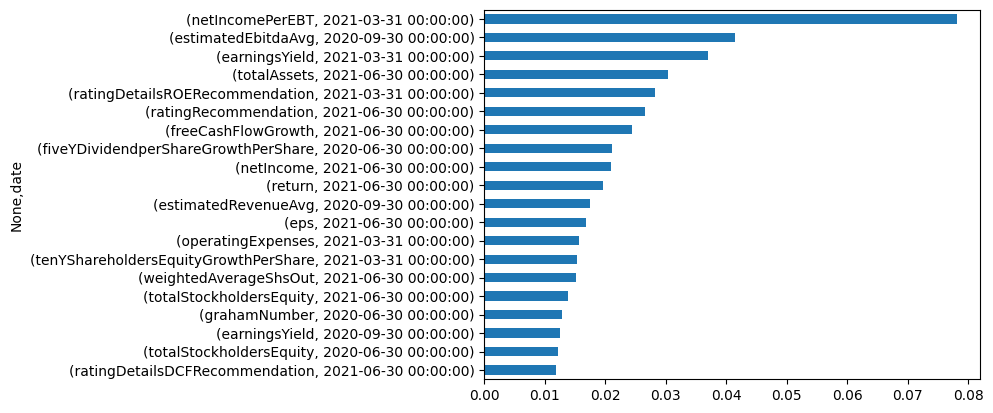

In [59]:
pd.Series(model.feature_importances_, index=X_train.columns).sort_values()[-20:].plot(kind="barh")

In [92]:
preds_ = preds.sort_values(by="y_pred")[-15:].copy()
preds_["weights"] = softmax(1+preds_["y_pred"])


In [95]:
preds_.to_csv("final_stocks.csv")

<Axes: >

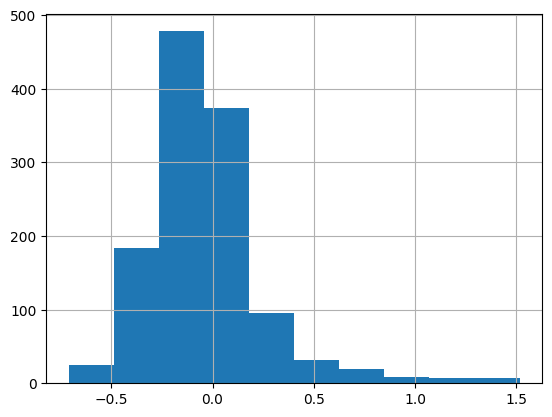

In [99]:
# Plot of all predicted returns
preds["y_pred"].hist()

<Axes: >

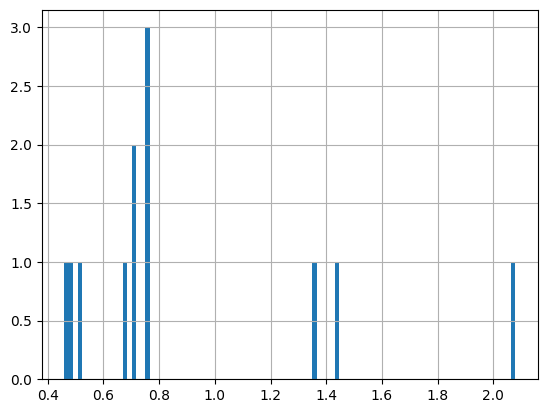

In [105]:
# Plot of actual returns of predicted stocks
preds_["y_test"].hist(bins=100)

In [76]:
preds.loc[euro_stocks, "weights"].to_frame().style

,weights
symbol,
8GW.IR,0.000581
A3M.MC,0.000745
AALB.AS,0.000783
ABN.AS,0.000921
ACA.PA,0.000812
ACCB.BR,0.000952
ACCEL.AS,0.001873
ACKB.BR,0.000939
ACOMO.AS,0.000888


In [89]:
preds.loc[euro_stocks].sort_values(by="y_pred").to_csv("preds.csv")

In [92]:
preds["y_pred"].loc[top20_stocks].to_frame().style

,y_pred
symbol,
MUN.PA,1.416719
IL0A.IR,1.418495
FGA.PA,1.425180
ALCOG.PA,1.429453
ALUCI.PA,1.429795
DPT.PA,1.429893
ALKKO.PA,1.430286
VLA.PA,1.435288
ALUNT.PA,1.469970


In [91]:
(preds["y_test"].loc[top20_stocks]).mean() 

1.6441040491070233

In [27]:
from src.models import train
from src.models import inference

In [28]:
start_train = dt.datetime.strptime("2016/01/31", "%Y/%m/%d")


In [29]:
start_train = dt.datetime.strptime("2016/01/31", "%Y/%m/%d")
end_train = dt.datetime.strptime("2018/01/31", "%Y/%m/%d")
start_val = dt.datetime.strptime("2018/01/31", "%Y/%m/%d")
end_val = dt.datetime.strptime("2018/06/30", "%Y/%m/%d")


train.train(start_train, end_train, start_val, end_val)

c:\Users\teuta\Desktop\vscode\quinten-stock-prediction\src\data\preprocessing.py:7: DtypeWarning: Columns (8,17,26,33,34,66,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,252,253,255,257,259,261,263,265,267,269,270,271,272,273,274,275,276,277,278,279,280,284,285,286,290) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, delimiter=";", parse_dates=date_cols).iloc[:, 1:]
c:\Users\teuta\Desktop\vscode\quinten-stock-prediction\src\data\preprocessing.py:50: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before callin

# Backtest

In [1]:
cd ..

/Users/kaancaylan/Desktop/HEC/DataProjectQuinten-StockPrediction/quinten-stock-prediction


In [2]:
from dateutil.relativedelta import relativedelta
from src.models import train
from src.models import inference
import src.data.preprocessing as pr
import datetime as dt
import pandas as pd

df = pr.get_data()

/Users/kaancaylan/.pyenv/versions/3.9.6/envs/myenv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kaancaylan/Desktop/HEC/DataProjectQuinten-StockPrediction/quinten-stock-prediction/src/data/preprocessing.py:7: DtypeWarning: Columns (8,17,26,33,34,66,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,252,253,255,257,259,261,263,265,267,269,270,271,272,273,274,275,276,277,278,279,280,284,285,286,290) have mixed types. Specify dtype option on impo

In [3]:
# get dates starting from 2015 Jan
train_duration_months = 24
validation_duration_months = 6
gap = 0

train_start_dates = [dt.datetime(2015, 1, 31) + relativedelta(months=validation_duration_months*i) for i in range(5)]
train_start_dates = [i - relativedelta(months=1) if i.month==7 else i  for i in train_start_dates]
train_end_dates = [i + relativedelta(months=24) for i in train_start_dates]
val_start_dates = [i for i in train_end_dates]
#val_start_dates = [i + relativedelta(months=1) if i.month==5 else i for i in val_start_dates]
val_end_dates = [i + relativedelta(months=validation_duration_months) for i in val_start_dates]
val_end_dates = [i + relativedelta(months=1) if i.month==12 else i - relativedelta(months=1) for i in val_end_dates]

print(train_start_dates, "\n", train_end_dates, "\n", val_start_dates,"\n" , val_end_dates)


inference_start_dates = [i + relativedelta(months=6) for i in train_end_dates]
inference_start_dates = [i - relativedelta(months=1) if i.month == 7 else i+relativedelta(months=1) for i in inference_start_dates]
inference_end_dates = [i + relativedelta(months=24) for i in inference_start_dates]
inference_end_dates = [i + relativedelta(months=1) if i.month == 12 else i for i in inference_end_dates]

predicted_start_dates = [i + relativedelta(months=6) for i in inference_end_dates]
predicted_start_dates = [i - relativedelta(months=1) if i.month == 7 else i+relativedelta(months=1) for i in predicted_start_dates]
predicted_end_dates = [i + relativedelta(months=6) for i in predicted_start_dates]
predicted_end_dates = [i - relativedelta(months=1) if i.month == 7 else i+relativedelta(months=1) for i in predicted_end_dates]



[datetime.datetime(2015, 1, 31, 0, 0), datetime.datetime(2015, 6, 30, 0, 0), datetime.datetime(2016, 1, 31, 0, 0), datetime.datetime(2016, 6, 30, 0, 0), datetime.datetime(2017, 1, 31, 0, 0)] 
 [datetime.datetime(2017, 1, 31, 0, 0), datetime.datetime(2017, 6, 30, 0, 0), datetime.datetime(2018, 1, 31, 0, 0), datetime.datetime(2018, 6, 30, 0, 0), datetime.datetime(2019, 1, 31, 0, 0)] 
 [datetime.datetime(2017, 1, 31, 0, 0), datetime.datetime(2017, 6, 30, 0, 0), datetime.datetime(2018, 1, 31, 0, 0), datetime.datetime(2018, 6, 30, 0, 0), datetime.datetime(2019, 1, 31, 0, 0)] 
 [datetime.datetime(2017, 6, 30, 0, 0), datetime.datetime(2018, 1, 30, 0, 0), datetime.datetime(2018, 6, 30, 0, 0), datetime.datetime(2019, 1, 30, 0, 0), datetime.datetime(2019, 6, 30, 0, 0)]


In [4]:
print(inference_start_dates)
print(inference_end_dates)
print(predicted_start_dates)
print(predicted_end_dates)

[datetime.datetime(2017, 6, 30, 0, 0), datetime.datetime(2018, 1, 30, 0, 0), datetime.datetime(2018, 6, 30, 0, 0), datetime.datetime(2019, 1, 30, 0, 0), datetime.datetime(2019, 6, 30, 0, 0)]
[datetime.datetime(2019, 6, 30, 0, 0), datetime.datetime(2020, 1, 30, 0, 0), datetime.datetime(2020, 6, 30, 0, 0), datetime.datetime(2021, 1, 30, 0, 0), datetime.datetime(2021, 6, 30, 0, 0)]
[datetime.datetime(2020, 1, 30, 0, 0), datetime.datetime(2020, 6, 30, 0, 0), datetime.datetime(2021, 1, 30, 0, 0), datetime.datetime(2021, 6, 30, 0, 0), datetime.datetime(2022, 1, 30, 0, 0)]
[datetime.datetime(2020, 6, 30, 0, 0), datetime.datetime(2021, 1, 30, 0, 0), datetime.datetime(2021, 6, 30, 0, 0), datetime.datetime(2022, 1, 30, 0, 0), datetime.datetime(2022, 6, 30, 0, 0)]


In [5]:
results = pd.DataFrame(columns=["y_test", "y_pred"])
for i in range(len(train_start_dates)):
    model_name = f"{str(train_start_dates[i])[:10]}: {str(train_end_dates[i])[:10]}"
    model = train.train(train_start_dates[i], train_end_dates[i], val_start_dates[i], val_end_dates[i],
        model_name=model_name, df=df)
    if model is None:
        continue
    
    res = inference.inference(inference_start_dates[i], inference_end_dates[i], predicted_start_dates[i], predicted_end_dates[i],
                        df=df, model=model)
    results = pd.concat([results, res.reset_index(drop=True)])
    break


ValueError: Feature shape mismatch, expected: 570, got 2280

In [10]:
df

year  quarter  week acceptedDate  calendarYear  \
date       symbol                                                     
2017-03-31 217A.F    2017        3    13   2017-03-31        2017.0   
           3E2.F     2017        3    13   2017-03-31        2017.0   
           558.SI    2017        3    13   2017-03-31        2017.0   
           8GW.IR    2017        3    13   2017-03-31        2017.0   
           A17U.SI   2017        3    13   2017-03-31        2017.0   
...                   ...      ...   ...          ...           ...   
2022-01-31 XIL.PA    2022        1     5          NaT           NaN   
           XIOR.BR   2022        1     5          NaT           NaN   
           YATRA.AS  2022        1     5          NaT           NaN   
           YK6B.F    2022        1     5          NaT           NaN   
           ZEL.NZ    2022        1     5          NaT           NaN   

                     costAndExpenses  costOfRevenue  \
date       symbol                                     
2017-03-31 217A.F       9.371870e+08    681700000.0   
           3E2.F        9.899200e+07     34659000.0   
           558.SI       2.836700e+07     20313000.0   
           8GW.IR       1.768102e+05            0.0   
           A17U.SI      7.152700e+07     54868000.0   
...                              ...            ...   
2022-01-31 XIL.PA                NaN            NaN   
           XIOR.BR               NaN            NaN   
           YATRA.AS              NaN            NaN   
           YK6B.F                NaN            NaN   
           ZEL.NZ                NaN            NaN   

                     depreciationAndAmortization       ebitda  ebitdaratio  \
date       symbol                                                            
2017-03-31 217A.F                    170953000.0  124313000.0     0.144185   
           3E2.F                       6938000.0    8056000.0     0.083145   
           558.SI                      1250000.0   13676000.0     0.327490   
           8GW.IR                            0.0    -174073.5     0.000000   
           A17U.SI                           0.0  102099000.0     0.488659   
...                                          ...          ...          ...   
2022-01-31 XIL.PA                            NaN          NaN          NaN   
           XIOR.BR                           NaN          NaN          NaN   
           YATRA.AS                          NaN          NaN          NaN   
           YK6B.F                            NaN          NaN          NaN   
           ZEL.NZ                            NaN          NaN          NaN   

                     ...  estimatedSgaExpenseLow  \
date       symbol    ...                           
2017-03-31 217A.F    ...                     NaN   
           3E2.F     ...                     NaN   
           558.SI    ...                     NaN   
           8GW.IR    ...                     NaN   
           A17U.SI   ...                     NaN   
...                  ...                     ...   
2022-01-31 XIL.PA    ...                     NaN   
           XIOR.BR   ...                     NaN   
           YATRA.AS  ...                     NaN   
           YK6B.F    ...                     NaN   
           ZEL.NZ    ...                     NaN   

                     numberAnalystEstimatedRevenue numberAnalystsEstimatedEps  \
date       symbol                                                               
2017-03-31 217A.F                              NaN                        NaN   
           3E2.F                               NaN                        NaN   
           558.SI                              NaN                        NaN   
           8GW.IR                              NaN                        NaN   
           A17U.SI                             NaN                        NaN   
...                                            ...                        ...   
2022-01-31 XIL.PA                        